In [1]:
# -- View Topology of Network
# Lighter color connections are connected to earlier layers (NOT weight strength)
import vis as nv
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

from sklearn.cluster import KMeans

In [2]:
figsize_y = 4
figsize_x = 8
legend_distance = -0.35
weights = np.array([-2.,  -1.5, -1.,  -0.5,  0.5,  1.,   1.5,  2.])

In [3]:
# Load stats:
"""
# Rows: [generations]
# Cols:
0: evaluations (one evaluation of one individual -- may be multiple rollouts)
1: median fitness 
2: median variance
3: median novelty 
4: best variance
5: elite variance
6: best variance
7: elite variance
9: top fitness (best fitness ever)
10: peak fitness (fitness earned with best single weight value by max individual)
11: median # of nodes in population
12: median # of connections in population]
"""
novelty = np.loadtxt('log/s_ns_stats.out', delimiter=',') 
variance = np.loadtxt('log/s_var_stats.out', delimiter=',') 
variance2 = np.loadtxt('log/s_var2_stats.out', delimiter=',') 
multi = np.loadtxt('log/s_multi_stats.out', delimiter=',') 
wann = np.loadtxt('log/sswingup_mean_stats.out', delimiter=',') 
wann2 = np.loadtxt('log/s_mean2_stats.out', delimiter=',') 

Text(0.5, 1.0, 'All methods - Median Number (#) of Nodes in Population')

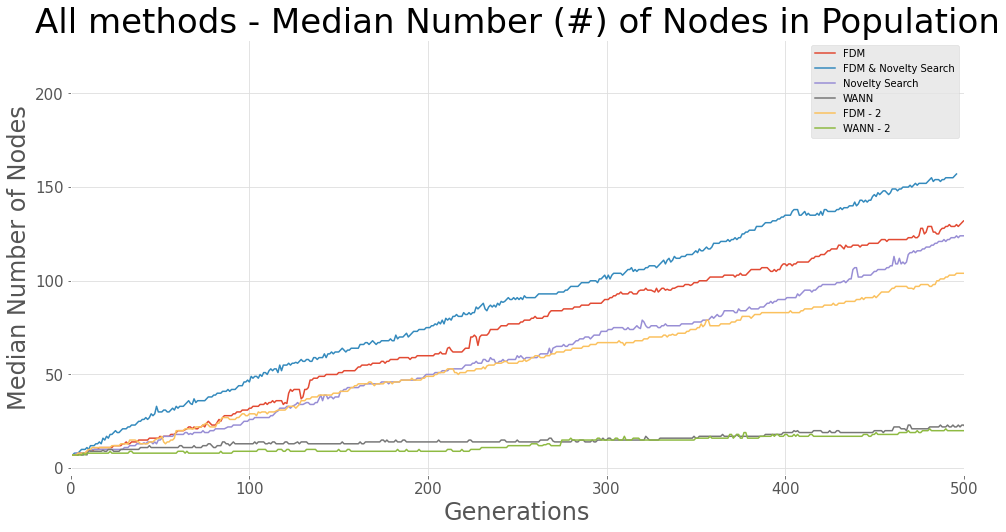

In [4]:
# with plt.xkcd():
# Plot fitness progress:

plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(variance[:,11], label="FDM")#, lw=1, marker='^', ms=4) # triangle
plt.plot(multi[:,11], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # circle
plt.plot(novelty[:,11], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,11], label="WANN")#, lw=1, marker='D', ms=4) # diamond
plt.plot(variance2[:,11], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,11], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()
plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Number of Nodes', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
# 
plt.savefig('images/all_methods_number_nodes.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,), 
            bbox_inches='tight')
plt.title('All methods - Median Number (#) of Nodes in Population', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median Number (#) of connections in Population')

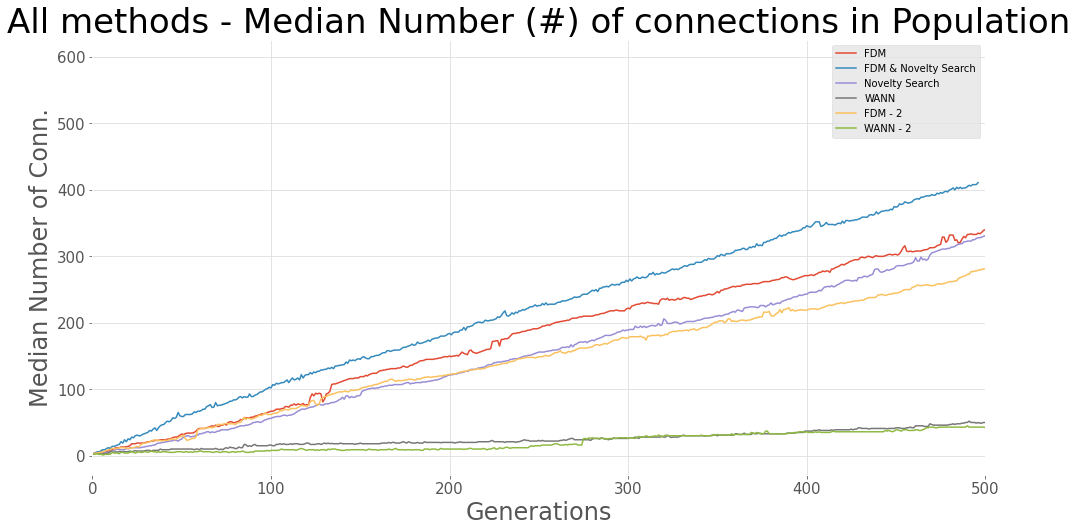

In [5]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(variance[:,12], label="FDM")#, lw=1, marker='^', ms=4) # triangle
plt.plot(multi[:,12], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # circle
plt.plot(novelty[:,12], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,12], label="WANN")#, lw=1, marker='D', ms=4) # diamond
plt.plot(variance2[:,12], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,12], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Number of Conn.', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)

plt.savefig('images/all_methods_number_conn.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')
plt.title('All methods - Median Number (#) of connections in Population', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median Variance')

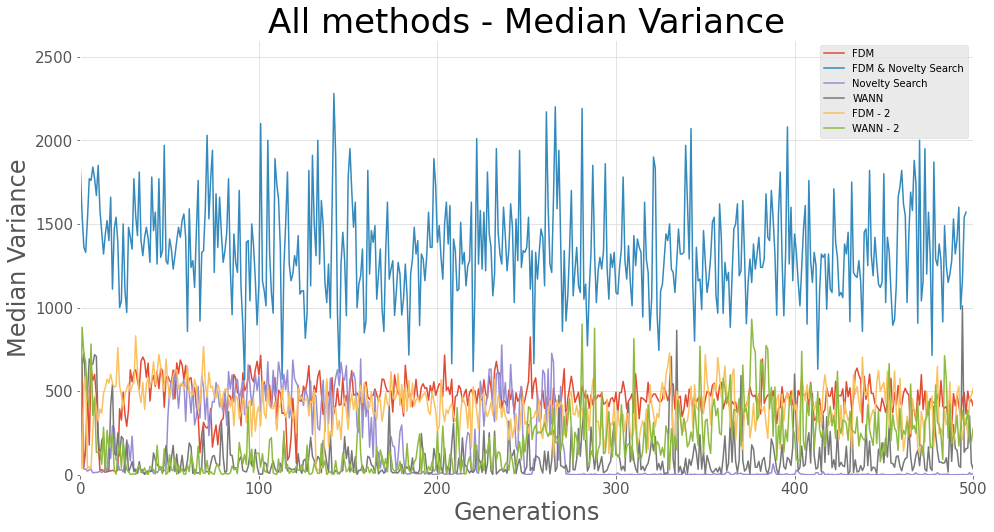

In [6]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(variance[:,2], label="FDM")#, lw=1, marker='^', ms=4) # triangle
plt.plot(multi[:,5], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,2], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,2], label="WANN")#, lw=1, marker='D', ms=4) # diamond
plt.plot(variance2[:,2], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,2], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Variance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 



axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=2600)

plt.savefig('images/all_methods_median_var.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')

plt.title('All methods - Median Variance', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Elite Variance')

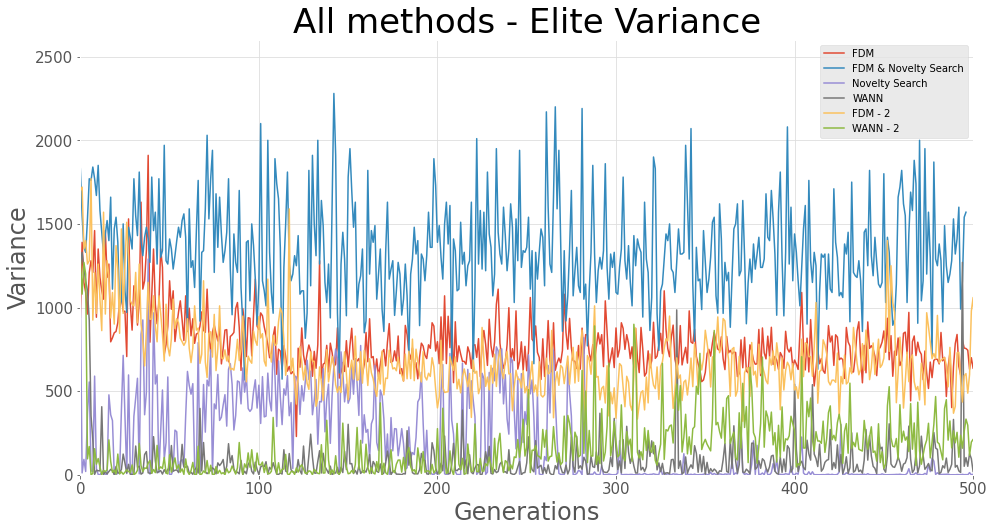

In [7]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(variance[:,5], label="FDM")#, lw=1, marker='^', ms=4) # square
plt.plot(multi[:,5], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,5], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,5], label="WANN")#, lw=1, marker='D', ms=4) # square
plt.plot(variance2[:,5], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,5], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Variance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 


axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=2600)


plt.savefig('images/all_methods_elite_variance.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')

plt.title('All methods - Elite Variance', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Median Reward')

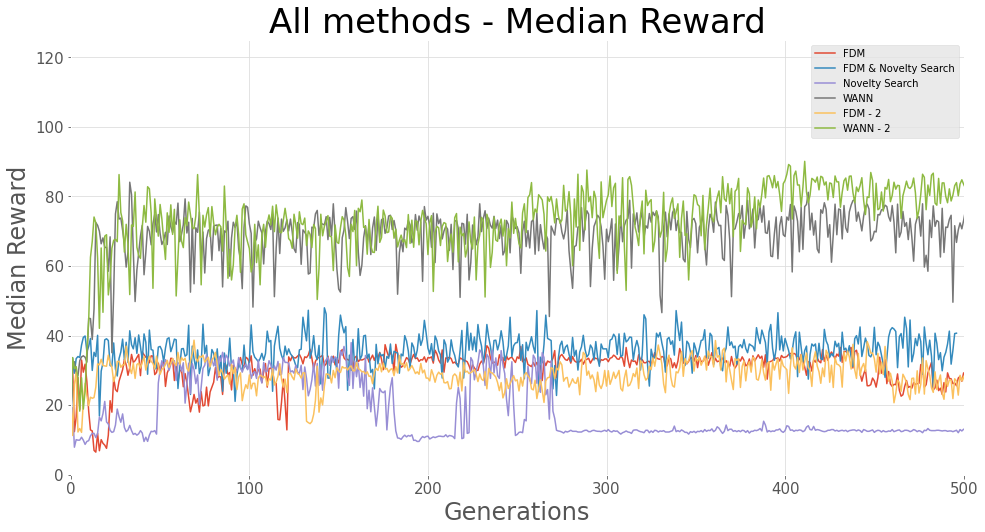

In [8]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)


plt.plot(variance[:,1], label="FDM")#, lw=1, marker='^', ms=4) # square
plt.plot(multi[:,1], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,1], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,1], label="WANN")#, lw=1, marker='D', ms=4) # square
plt.plot(variance2[:,1], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,1], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Median Reward', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 



axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=125)

plt.savefig('images/all_methods_median_reward.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')

plt.title('All methods - Median Reward', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Reward of The Best Agent')

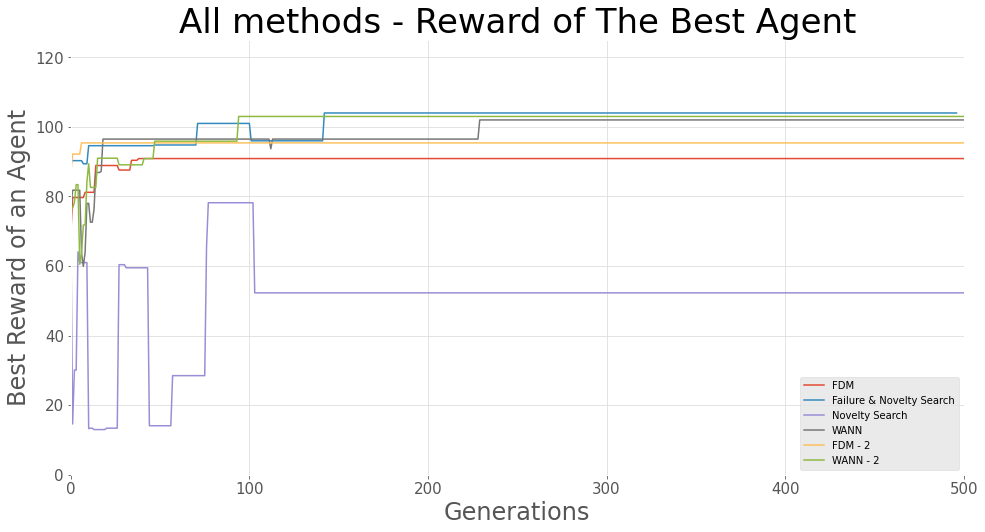

In [9]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(variance[:,10], label="FDM")#, lw=1, marker='^', ms=4) # square
plt.plot(multi[:,10], label="Failure & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,10], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,10], label="WANN")#, lw=1, marker='D', ms=4) # square
plt.plot(variance2[:,10], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,10], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best Reward of an Agent', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=125)


plt.savefig('images/all_methods_peak_reward.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')


plt.title('All methods - Reward of The Best Agent', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Best Family Reward')

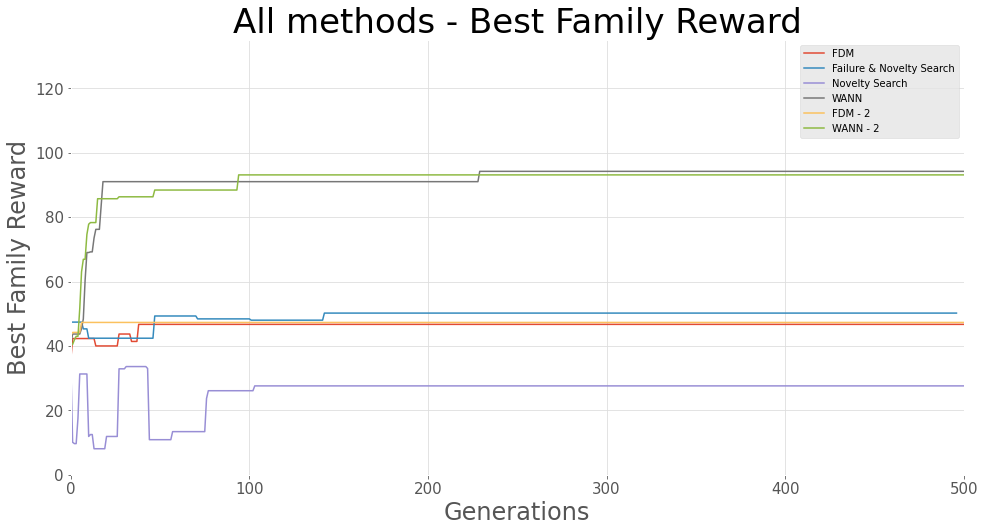

In [10]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(variance[:,9], label="FDM")#, lw=1, marker='^', ms=4) # square
plt.plot(multi[:,9], label="Failure & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,9], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,9], label="WANN")#, lw=1, marker='D', ms=4) # square
plt.plot(variance2[:,9], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,9], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best Family Reward', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=135)


plt.savefig('images/all_methods_best_family_reward.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')

plt.title('All methods - Best Family Reward', fontsize = 34) 

Text(0.5, 1.0, 'All methods - Best Variance')

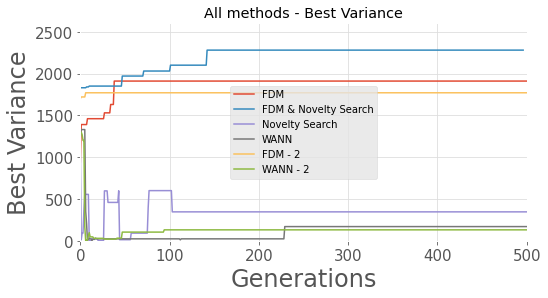

In [11]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x,figsize_y))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)

plt.plot(variance[:,4], label="FDM")#, lw=1, marker='^', ms=4) # square
plt.plot(multi[:,4], label="FDM & Novelty Search")#, lw=1, marker='o', ms=4) # square
plt.plot(novelty[:,4], label="Novelty Search")#, lw=1, marker='s', ms=4) # square
plt.plot(wann[:,4], label="WANN")#, lw=1, marker='D', ms=4) # square
plt.plot(variance2[:,4], label="FDM - 2")#, lw=1, marker='^', ms=4) # triangle
plt.plot(wann2[:,4], label="WANN - 2")#, lw=1, marker='D', ms=4) # diamond

# lg = plt.legend(bbox_to_anchor=(-0.07, legend_distance, 1.95, .02), loc='lower left', frameon=False,
#            ncol=4, borderaxespad=0., facecolor="white", fontsize = 20)
plt.grid(True)
plt.legend()

plt.xlabel('Generations', fontsize = 24) 
plt.ylabel('Best Variance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)


axes = plt.gca()
# axes.set_xlim([0,500])
ax.set_xbound(lower=0.0, upper=500)
ax.set_ybound(lower=0.0, upper=2600)


plt.savefig('images/all_methods_best_variance.png',dpi=300, 
            format='png', 
#             bbox_extra_artists=(lg,),
            bbox_inches='tight')


plt.title('All methods - Best Variance')

In [12]:
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_var_best.out --nReps 1 --nVals 8 --view False -o fdm 
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_wann_best.out --nReps 1 --nVals 8 --view False -o wann
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_ns_best.out --nReps 1 --nVals 8 --view False -o ns
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_multi_best.out --nReps 1 --nVals 8 --view False -o fdm_ns

In [13]:
# # python3 fdm_test.py -p p/swingup_wann.json -i log/s_ns_best.out --nReps 100 --nVals 8 --view False -o ns
reward_ns = np.loadtxt('test_log/ns_reward.out', delimiter=',') 
std_ns = np.loadtxt('test_log/ns_std.out', delimiter=',')

# # python3 fdm_test.py -p p/swingup_wann.json -i log/s_var_best.out --nReps 100 --nVals 8 --view False -o fdm
reward_fdm = np.loadtxt('test_log/fdm_reward.out', delimiter=',') 
std_fdm = np.loadtxt('test_log/fdm_std.out', delimiter=',')

# # # python3 fdm_test.py -p p/swingup_wann.json -i log/fdm_noise_best.out --nReps 100 --nVals 8 --view False -o fdm_noise
# reward_fdm_noise = np.loadtxt('test_log/fdm_noise_reward.out', delimiter=',') 
# std_fdm_noise = np.loadtxt('test_log/fdm_noise_std.out', delimiter=',')

# # python3 fdm_test.py -p p/swingup_wann.json -i log/s_multi_best.out --nReps 100 --nVals 8 --view False -o fdm_ns
reward_fdm_ns = np.loadtxt('test_log/fdm_ns_reward.out', delimiter=',') 
std_fdm_ns = np.loadtxt('test_log/fdm_ns_std.out', delimiter=',')

# # python3 fdm_test.py -p p/swingup_wann.json -i log/sswingup_mean_best.out --nReps 100 --nVals 8 --view False -o wann
reward_wann = np.loadtxt('test_log/wann_reward.out', delimiter=',') 
std_wann = np.loadtxt('test_log/wann_std.out', delimiter=',')

Text(0.5, 1.0, 'All methods - Best Variance - Noise = 0')

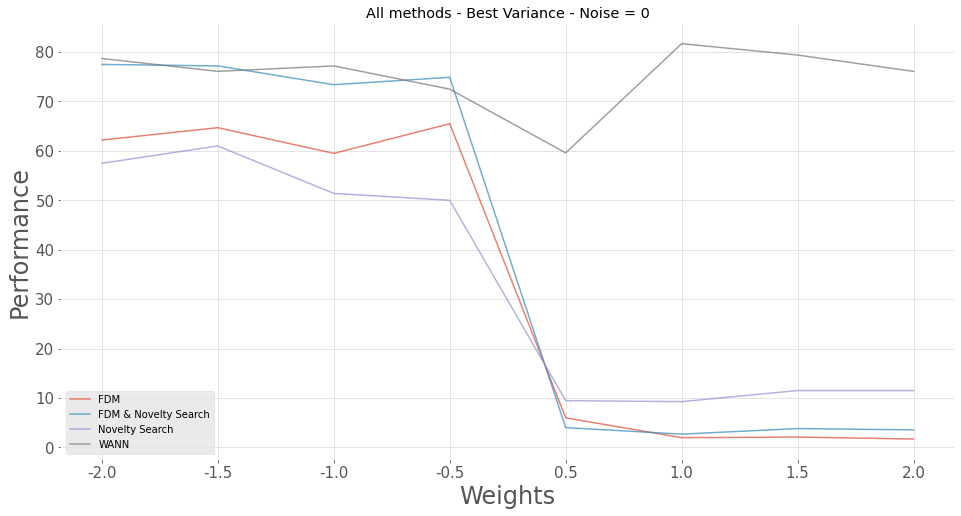

In [14]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))


plt.plot(xi,reward_fdm, label="FDM", alpha = 0.7)
plt.fill_between(xi, reward_fdm+std_fdm, reward_fdm-std_fdm, alpha = 0.7)
plt.plot(xi,reward_fdm_ns, label="FDM & Novelty Search", alpha = 0.7)
plt.fill_between(xi, reward_fdm_ns+std_fdm_ns, reward_fdm_ns-std_fdm_ns, alpha = 0.7)
plt.plot(xi,reward_ns, label="Novelty Search", alpha = 0.7)
plt.fill_between(xi, reward_ns+std_ns, reward_ns-std_ns, alpha = 0.7)
plt.plot(xi,reward_wann, label="WANN", alpha = 0.7)
plt.fill_between(xi, reward_wann+std_wann, reward_wann-std_wann, alpha = 0.7)

# plt.plot(xi,reward_fdm_noise, label="FDM noise", alpha = 0.7)
# plt.fill_between(xi, reward_fdm_noise+std_fdm_noise, reward_fdm_noise-std_fdm_noise, alpha = 0.7)

plt.grid(True)
plt.legend()

plt.xlabel('Weights', fontsize = 24) 
plt.ylabel('Performance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()

plt.xticks(xi,weights)

plt.savefig('images/all_methods_weights_vs_rewards.png',dpi=300, 
            format='png', 
            bbox_inches='tight')


plt.title('All methods - Best Variance - Noise = 0')

In [15]:
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_var_best.out --nReps 1 --nVals 8 --view False -o fdm --seed 421
# !python3 fdm_test.py -p p/swingup_wann.json -i log/sswingup_mean_best.out --nReps 1 --nVals 8 --view False -o wann --seed 421
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_ns_best.out --nReps 1 --nVals 8 --view False -o ns --seed 421
# !python3 fdm_test.py -p p/swingup_wann.json -i log/s_multi_best.out --nReps 1 --nVals 8 --view False -o fdm_ns  --seed 421

In [16]:
ang_ns_1 = np.loadtxt('behaviour/ns_ang_value_1.out', delimiter=',') 
ang_fdm_1 = np.loadtxt('behaviour/fdm_ang_value_1.out', delimiter=',') 
ang_fdm_ns_1 = np.loadtxt('behaviour/fdm_ns_ang_value_1.out', delimiter=',') 
ang_wann_1 = np.loadtxt('behaviour/wann_ang_value_1.out', delimiter=',') 

ang_ns_2 = np.loadtxt('behaviour/ns_ang_value_2.out', delimiter=',') 
ang_fdm_2 = np.loadtxt('behaviour/fdm_ang_value_2.out', delimiter=',') 
ang_fdm_ns_2 = np.loadtxt('behaviour/fdm_ns_ang_value_2.out', delimiter=',') 
ang_wann_2 = np.loadtxt('behaviour/wann_ang_value_2.out', delimiter=',') 

ang_ns_3 = np.loadtxt('behaviour/ns_ang_value_3.out', delimiter=',') 
ang_fdm_3 = np.loadtxt('behaviour/fdm_ang_value_3.out', delimiter=',') 
ang_fdm_ns_3 = np.loadtxt('behaviour/fdm_ns_ang_value_3.out', delimiter=',') 
ang_wann_3 = np.loadtxt('behaviour/wann_ang_value_3.out', delimiter=',') 

ang_ns_4 = np.loadtxt('behaviour/ns_ang_value_4.out', delimiter=',') 
ang_fdm_4 = np.loadtxt('behaviour/fdm_ang_value_4.out', delimiter=',') 
ang_fdm_ns_4 = np.loadtxt('behaviour/fdm_ns_ang_value_4.out', delimiter=',') 
ang_wann_4 = np.loadtxt('behaviour/wann_ang_value_4.out', delimiter=',') 

ang_ns_5 = np.loadtxt('behaviour/ns_ang_value_5.out', delimiter=',') 
ang_fdm_5 = np.loadtxt('behaviour/fdm_ang_value_5.out', delimiter=',') 
ang_fdm_ns_5 = np.loadtxt('behaviour/fdm_ns_ang_value_5.out', delimiter=',') 
ang_wann_5 = np.loadtxt('behaviour/wann_ang_value_5.out', delimiter=',') 

ang_ns_6 = np.loadtxt('behaviour/ns_ang_value_6.out', delimiter=',') 
ang_fdm_6 = np.loadtxt('behaviour/fdm_ang_value_6.out', delimiter=',') 
ang_fdm_ns_6 = np.loadtxt('behaviour/fdm_ns_ang_value_6.out', delimiter=',') 
ang_wann_6 = np.loadtxt('behaviour/wann_ang_value_6.out', delimiter=',') 

ang_ns_7 = np.loadtxt('behaviour/ns_ang_value_7.out', delimiter=',') 
ang_fdm_7 = np.loadtxt('behaviour/fdm_ang_value_7.out', delimiter=',') 
ang_fdm_ns_7 = np.loadtxt('behaviour/fdm_ns_ang_value_7.out', delimiter=',') 
ang_wann_7 = np.loadtxt('behaviour/wann_ang_value_7.out', delimiter=',') 

ang_ns_8 = np.loadtxt('behaviour/ns_ang_value_0.out', delimiter=',') 
ang_fdm_8 = np.loadtxt('behaviour/fdm_ang_value_0.out', delimiter=',') 
ang_fdm_ns_8 = np.loadtxt('behaviour/fdm_ns_ang_value_0.out', delimiter=',') 
ang_wann_8 = np.loadtxt('behaviour/wann_ang_value_0.out', delimiter=',') 

In [17]:
pos_x_ns_1 = np.loadtxt('behaviour/ns_pos_x_1.out', delimiter=',') 
pos_x_fdm_1 = np.loadtxt('behaviour/fdm_pos_x_1.out', delimiter=',') 
pos_x_fdm_ns_1 = np.loadtxt('behaviour/fdm_ns_pos_x_1.out', delimiter=',') 
pos_x_wann_1 = np.loadtxt('behaviour/wann_pos_x_1.out', delimiter=',') 

pos_x_ns_2 = np.loadtxt('behaviour/ns_pos_x_2.out', delimiter=',') 
pos_x_fdm_2 = np.loadtxt('behaviour/fdm_pos_x_2.out', delimiter=',') 
pos_x_fdm_ns_2 = np.loadtxt('behaviour/fdm_ns_pos_x_2.out', delimiter=',') 
pos_x_wann_2 = np.loadtxt('behaviour/wann_pos_x_2.out', delimiter=',') 

pos_x_ns_3 = np.loadtxt('behaviour/ns_pos_x_3.out', delimiter=',') 
pos_x_fdm_3 = np.loadtxt('behaviour/fdm_pos_x_3.out', delimiter=',') 
pos_x_fdm_ns_3 = np.loadtxt('behaviour/fdm_ns_pos_x_3.out', delimiter=',') 
pos_x_wann_3 = np.loadtxt('behaviour/wann_pos_x_3.out', delimiter=',') 

pos_x_ns_4 = np.loadtxt('behaviour/ns_pos_x_4.out', delimiter=',') 
pos_x_fdm_4 = np.loadtxt('behaviour/fdm_pos_x_4.out', delimiter=',') 
pos_x_fdm_ns_4 = np.loadtxt('behaviour/fdm_ns_pos_x_4.out', delimiter=',') 
pos_x_wann_4 = np.loadtxt('behaviour/wann_pos_x_4.out', delimiter=',') 

pos_x_ns_5 = np.loadtxt('behaviour/ns_pos_x_5.out', delimiter=',') 
pos_x_fdm_5 = np.loadtxt('behaviour/fdm_pos_x_5.out', delimiter=',') 
pos_x_fdm_ns_5 = np.loadtxt('behaviour/fdm_ns_pos_x_5.out', delimiter=',') 
pos_x_wann_5 = np.loadtxt('behaviour/wann_pos_x_5.out', delimiter=',') 

pos_x_ns_6 = np.loadtxt('behaviour/ns_pos_x_6.out', delimiter=',') 
pos_x_fdm_6 = np.loadtxt('behaviour/fdm_pos_x_6.out', delimiter=',') 
pos_x_fdm_ns_6 = np.loadtxt('behaviour/fdm_ns_pos_x_6.out', delimiter=',') 
pos_x_wann_6 = np.loadtxt('behaviour/wann_pos_x_6.out', delimiter=',') 

pos_x_ns_7 = np.loadtxt('behaviour/ns_pos_x_7.out', delimiter=',') 
pos_x_fdm_7 = np.loadtxt('behaviour/fdm_pos_x_7.out', delimiter=',') 
pos_x_fdm_ns_7 = np.loadtxt('behaviour/fdm_ns_pos_x_7.out', delimiter=',') 
pos_x_wann_7 = np.loadtxt('behaviour/wann_pos_x_7.out', delimiter=',') 

pos_x_ns_8 = np.loadtxt('behaviour/ns_pos_x_0.out', delimiter=',') 
pos_x_fdm_8 = np.loadtxt('behaviour/fdm_pos_x_0.out', delimiter=',') 
pos_x_fdm_ns_8 = np.loadtxt('behaviour/fdm_ns_pos_x_0.out', delimiter=',') 
pos_x_wann_8 = np.loadtxt('behaviour/wann_pos_x_0.out', delimiter=',') 

In [18]:
pos_x_p_ns_1 = np.array([math.cos(i)*0.6 for i in ang_ns_1])
pos_x_p_fdm_1 = np.array([math.cos(i)*0.6 for i in ang_fdm_1])
pos_x_p_fdm_ns_1 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_1])
pos_x_p_wann_1 = np.array([math.cos(i)*0.6 for i in ang_wann_1])

pos_x_p_ns_2 = np.array([math.cos(i)*0.6 for i in ang_ns_2])
pos_x_p_fdm_2 = np.array([math.cos(i)*0.6 for i in ang_fdm_2])
pos_x_p_fdm_ns_2 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_2])
pos_x_p_wann_2 = np.array([math.cos(i)*0.6 for i in ang_wann_2])

pos_x_p_ns_3 = np.array([math.cos(i)*0.6 for i in ang_ns_3])
pos_x_p_fdm_3 = np.array([math.cos(i)*0.6 for i in ang_fdm_3])
pos_x_p_fdm_ns_3 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_3])
pos_x_p_wann_3 = np.array([math.cos(i)*0.6 for i in ang_wann_3])

pos_x_p_ns_4 = np.array([math.cos(i)*0.6 for i in ang_ns_4])
pos_x_p_fdm_4 = np.array([math.cos(i)*0.6 for i in ang_fdm_4])
pos_x_p_fdm_ns_4 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_4])
pos_x_p_wann_4 = np.array([math.cos(i)*0.6 for i in ang_wann_4])

pos_x_p_ns_5 = np.array([math.cos(i)*0.6 for i in ang_ns_5])
pos_x_p_fdm_5 = np.array([math.cos(i)*0.6 for i in ang_fdm_5])
pos_x_p_fdm_ns_5 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_5])
pos_x_p_wann_5 = np.array([math.cos(i)*0.6 for i in ang_wann_5])

pos_x_p_ns_6 = np.array([math.cos(i)*0.6 for i in ang_ns_6])
pos_x_p_fdm_6 = np.array([math.cos(i)*0.6 for i in ang_fdm_6])
pos_x_p_fdm_ns_6 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_6])
pos_x_p_wann_6 = np.array([math.cos(i)*0.6 for i in ang_wann_6])

pos_x_p_ns_7 = np.array([math.cos(i)*0.6 for i in ang_ns_7])
pos_x_p_fdm_7 = np.array([math.cos(i)*0.6 for i in ang_fdm_7])
pos_x_p_fdm_ns_7 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_7])
pos_x_p_wann_7 = np.array([math.cos(i)*0.6 for i in ang_wann_7])

pos_x_p_ns_8 = np.array([math.cos(i)*0.6 for i in ang_ns_8])
pos_x_p_fdm_8 = np.array([math.cos(i)*0.6 for i in ang_fdm_8])
pos_x_p_fdm_ns_8 = np.array([math.cos(i)*0.6 for i in ang_fdm_ns_8])
pos_x_p_wann_8 = np.array([math.cos(i)*0.6 for i in ang_wann_8])

In [19]:
pos_y_p_ns_1 = np.array([math.sin(i)*0.6 for i in ang_ns_1])
pos_y_p_fdm_1 = np.array([math.sin(i)*0.6 for i in ang_fdm_1])
pos_y_p_fdm_ns_1 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_1])
pos_y_p_wann_1 = np.array([math.sin(i)*0.6 for i in ang_wann_1])

pos_y_p_ns_2 = np.array([math.sin(i)*0.6 for i in ang_ns_2])
pos_y_p_fdm_2 = np.array([math.sin(i)*0.6 for i in ang_fdm_2])
pos_y_p_fdm_ns_2 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_2])
pos_y_p_wann_2 = np.array([math.sin(i)*0.6 for i in ang_wann_2])

pos_y_p_ns_3 = np.array([math.sin(i)*0.6 for i in ang_ns_3])
pos_y_p_fdm_3 = np.array([math.sin(i)*0.6 for i in ang_fdm_3])
pos_y_p_fdm_ns_3 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_3])
pos_y_p_wann_3 = np.array([math.sin(i)*0.6 for i in ang_wann_3])

pos_y_p_ns_4 = np.array([math.sin(i)*0.6 for i in ang_ns_4])
pos_y_p_fdm_4 = np.array([math.sin(i)*0.6 for i in ang_fdm_4])
pos_y_p_fdm_ns_4 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_4])
pos_y_p_wann_4 = np.array([math.sin(i)*0.6 for i in ang_wann_4])

pos_y_p_ns_5 = np.array([math.sin(i)*0.6 for i in ang_ns_5])
pos_y_p_fdm_5 = np.array([math.sin(i)*0.6 for i in ang_fdm_5])
pos_y_p_fdm_ns_5 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_5])
pos_y_p_wann_5 = np.array([math.sin(i)*0.6 for i in ang_wann_5])

pos_y_p_ns_6 = np.array([math.sin(i)*0.6 for i in ang_ns_6])
pos_y_p_fdm_6 = np.array([math.sin(i)*0.6 for i in ang_fdm_6])
pos_y_p_fdm_ns_6 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_6])
pos_y_p_wann_6 = np.array([math.sin(i)*0.6 for i in ang_wann_6])

pos_y_p_ns_7 = np.array([math.sin(i)*0.6 for i in ang_ns_7])
pos_y_p_fdm_7 = np.array([math.sin(i)*0.6 for i in ang_fdm_7])
pos_y_p_fdm_ns_7 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_7])
pos_y_p_wann_7 = np.array([math.sin(i)*0.6 for i in ang_wann_7])

pos_y_p_ns_8 = np.array([math.sin(i)*0.6 for i in ang_ns_8])
pos_y_p_fdm_8 = np.array([math.sin(i)*0.6 for i in ang_fdm_8])
pos_y_p_fdm_ns_8 = np.array([math.sin(i)*0.6 for i in ang_fdm_ns_8])
pos_y_p_wann_8 = np.array([math.sin(i)*0.6 for i in ang_wann_8])

Text(0.5, 1.0, 'Family Pendulum Position sub-set - NS')

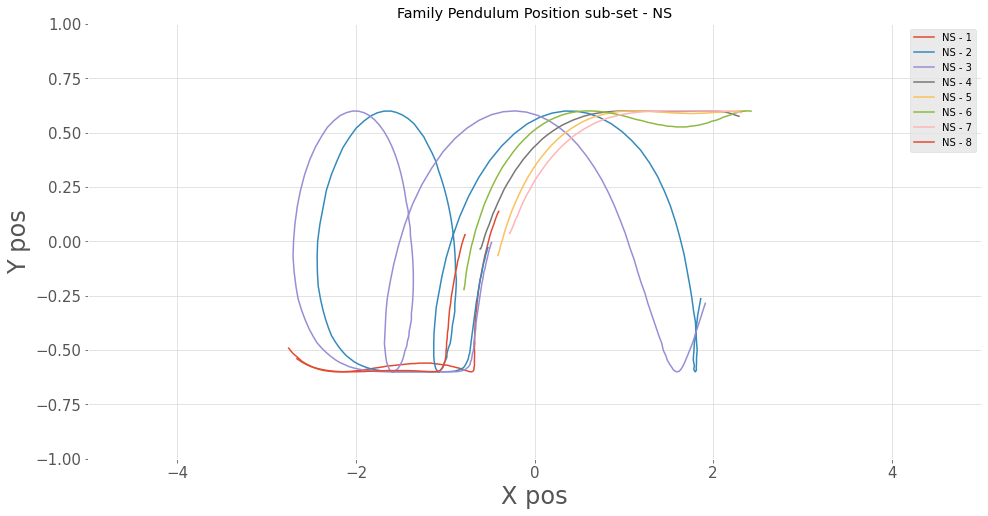

In [20]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))



plt.plot(pos_x_p_ns_1+pos_x_ns_1,pos_y_p_ns_1, label="NS - 1") # Ok
plt.plot(pos_x_p_ns_2+pos_x_ns_2,pos_y_p_ns_2, label="NS - 2") # Ok
plt.plot(pos_x_p_ns_3+pos_x_ns_3,pos_y_p_ns_3, label="NS - 3")
plt.plot(pos_x_p_ns_4+pos_x_ns_4,pos_y_p_ns_4, label="NS - 4") # Ok
plt.plot(pos_x_p_ns_5+pos_x_ns_5,pos_y_p_ns_5, label="NS - 5")
plt.plot(pos_x_p_ns_6+pos_x_ns_6,pos_y_p_ns_6, label="NS - 6")
plt.plot(pos_x_p_ns_7+pos_x_ns_7,pos_y_p_ns_7, label="NS - 7")
plt.plot(pos_x_p_ns_8+pos_x_ns_8,pos_y_p_ns_8, label="NS - 8") # Ok but circle
# plt.plot(xi,reward_fdm_noise, label="FDM noise", alpha = 0.7)
# plt.fill_between(xi, reward_fdm_noise+std_fdm_noise, reward_fdm_noise-std_fdm_noise, alpha = 0.7)

plt.grid(True)
plt.legend()

plt.xlabel('X pos', fontsize = 24) 
plt.ylabel('Y pos', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()


# axes.set_xlim([0,500])
ax.set_xbound(lower=-5, upper=5)
ax.set_ybound(lower=-1, upper=1)

plt.title('Family Pendulum Position sub-set - NS')

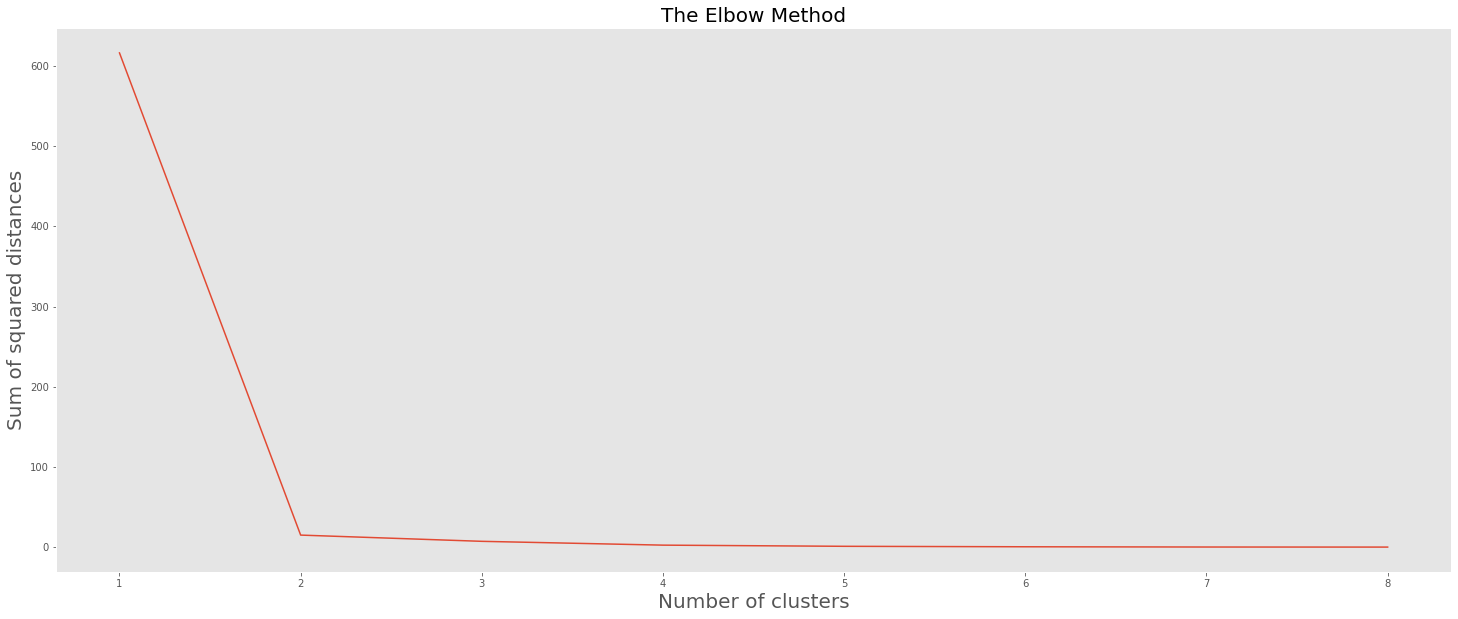

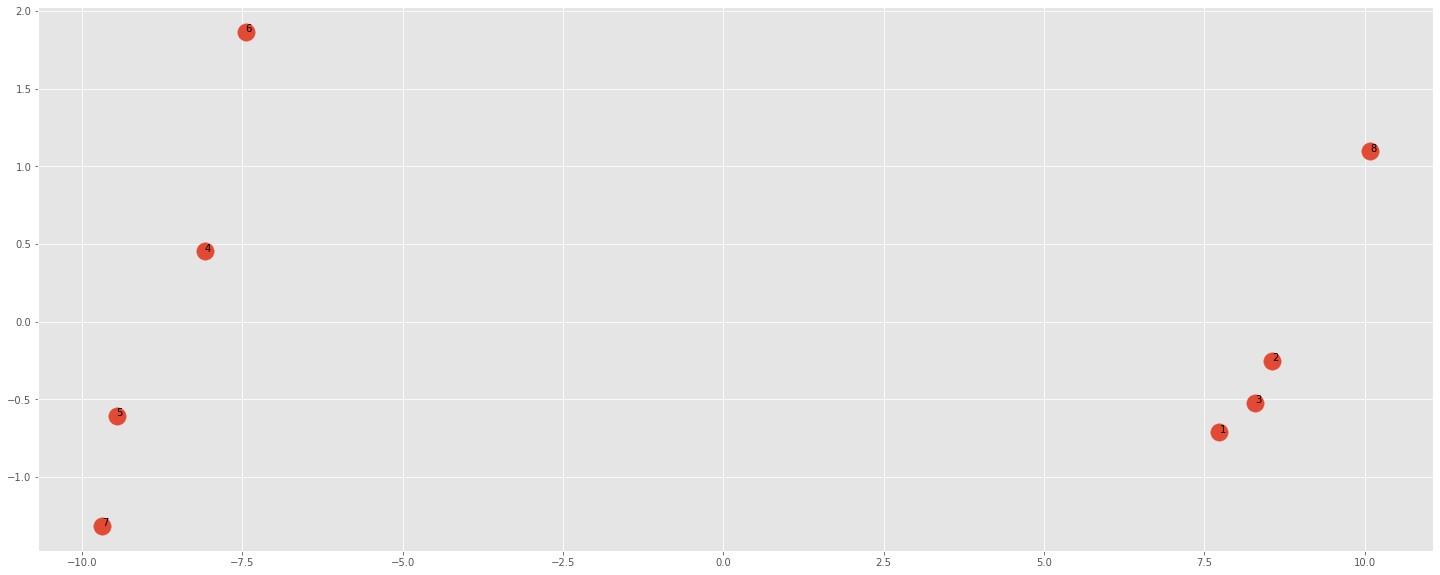

In [21]:
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

t_series_1_ns = pd.DataFrame([[pos_x_p_ns_1[i]+pos_x_ns_1[i], pos_y_p_ns_1[i]] for i in range(len(pos_x_p_ns_1))],columns=['X','Y'])
t_series_2_ns = pd.DataFrame([[pos_x_p_ns_2[i]+pos_x_ns_2[i], pos_y_p_ns_2[i]] for i in range(len(pos_x_p_ns_2))],columns=['X','Y'])
t_series_3_ns = pd.DataFrame([[pos_x_p_ns_3[i]+pos_x_ns_3[i], pos_y_p_ns_3[i]] for i in range(len(pos_x_p_ns_3))],columns=['X','Y'])
t_series_4_ns = pd.DataFrame([[pos_x_p_ns_4[i]+pos_x_ns_4[i], pos_y_p_ns_4[i]] for i in range(len(pos_x_p_ns_4))],columns=['X','Y'])
t_series_5_ns = pd.DataFrame([[pos_x_p_ns_5[i]+pos_x_ns_5[i], pos_y_p_ns_5[i]] for i in range(len(pos_x_p_ns_5))],columns=['X','Y'])
t_series_6_ns = pd.DataFrame([[pos_x_p_ns_6[i]+pos_x_ns_6[i], pos_y_p_ns_6[i]] for i in range(len(pos_x_p_ns_6))],columns=['X','Y'])
t_series_7_ns = pd.DataFrame([[pos_x_p_ns_7[i]+pos_x_ns_7[i], pos_y_p_ns_7[i]] for i in range(len(pos_x_p_ns_7))],columns=['X','Y'])
t_series_8_ns = pd.DataFrame([[pos_x_p_ns_8[i]+pos_x_ns_8[i], pos_y_p_ns_8[i]] for i in range(len(pos_x_p_ns_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_ns.to_numpy().flatten(),
                t_series_2_ns.to_numpy().flatten(),
                t_series_3_ns.to_numpy().flatten(),
                t_series_4_ns.to_numpy().flatten(),
                t_series_5_ns.to_numpy().flatten(),
                t_series_6_ns.to_numpy().flatten(),
                t_series_7_ns.to_numpy().flatten(),
                t_series_8_ns.to_numpy().flatten()])

df3 = df.dropna(axis = 1, how = 'any')

ssd = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df3 = pca.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.assign(Agent = [1,2,3,4,5,6,7,8])

plt.figure(figsize=(25,10))
plt.plot(range(1, 9), ssd)
plt.grid()
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

plt.figure(figsize=(25,10))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df3.iloc[i,0],df3.iloc[i,1],df3.iloc[i,2])
plt.show()

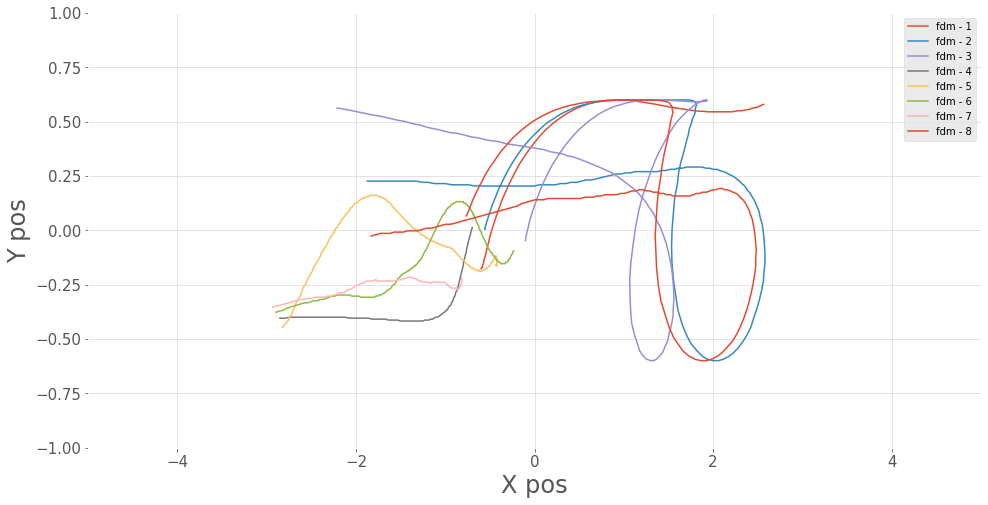

In [22]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))



plt.plot(pos_x_p_fdm_1+pos_x_fdm_1,pos_y_p_fdm_1, label="fdm - 1")
plt.plot(pos_x_p_fdm_2+pos_x_fdm_2,pos_y_p_fdm_2, label="fdm - 2")
plt.plot(pos_x_p_fdm_3+pos_x_fdm_3,pos_y_p_fdm_3, label="fdm - 3")
plt.plot(pos_x_p_fdm_4+pos_x_fdm_4,pos_y_p_fdm_4, label="fdm - 4") 
plt.plot(pos_x_p_fdm_5+pos_x_fdm_5,pos_y_p_fdm_5, label="fdm - 5") 
plt.plot(pos_x_p_fdm_6+pos_x_fdm_6,pos_y_p_fdm_6, label="fdm - 6")
plt.plot(pos_x_p_fdm_7+pos_x_fdm_7,pos_y_p_fdm_7, label="fdm - 7")
plt.plot(pos_x_p_fdm_8+pos_x_fdm_8,pos_y_p_fdm_8, label="fdm - 8")


plt.grid(True)
plt.legend()

plt.xlabel('X pos', fontsize = 24) 
plt.ylabel('Y pos', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()

# axes.set_xlim([0,500])
ax.set_xbound(lower=-5, upper=5)
ax.set_ybound(lower=-1, upper=1)



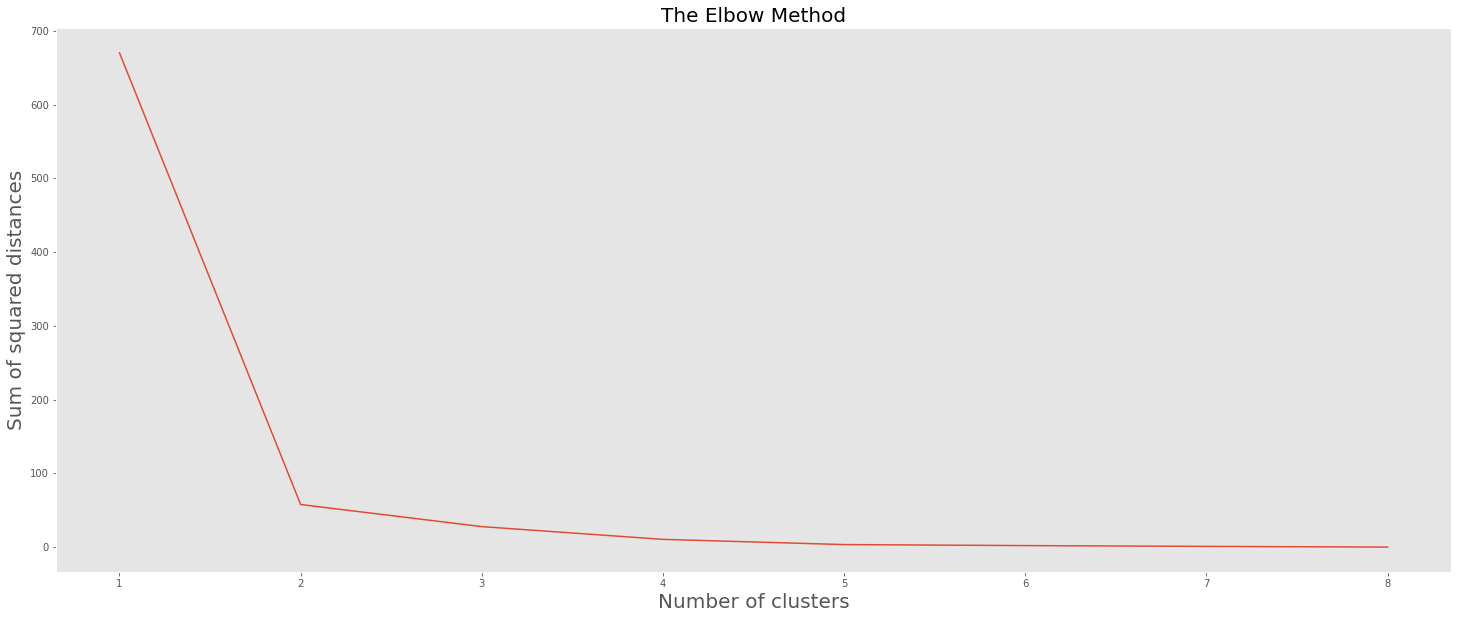

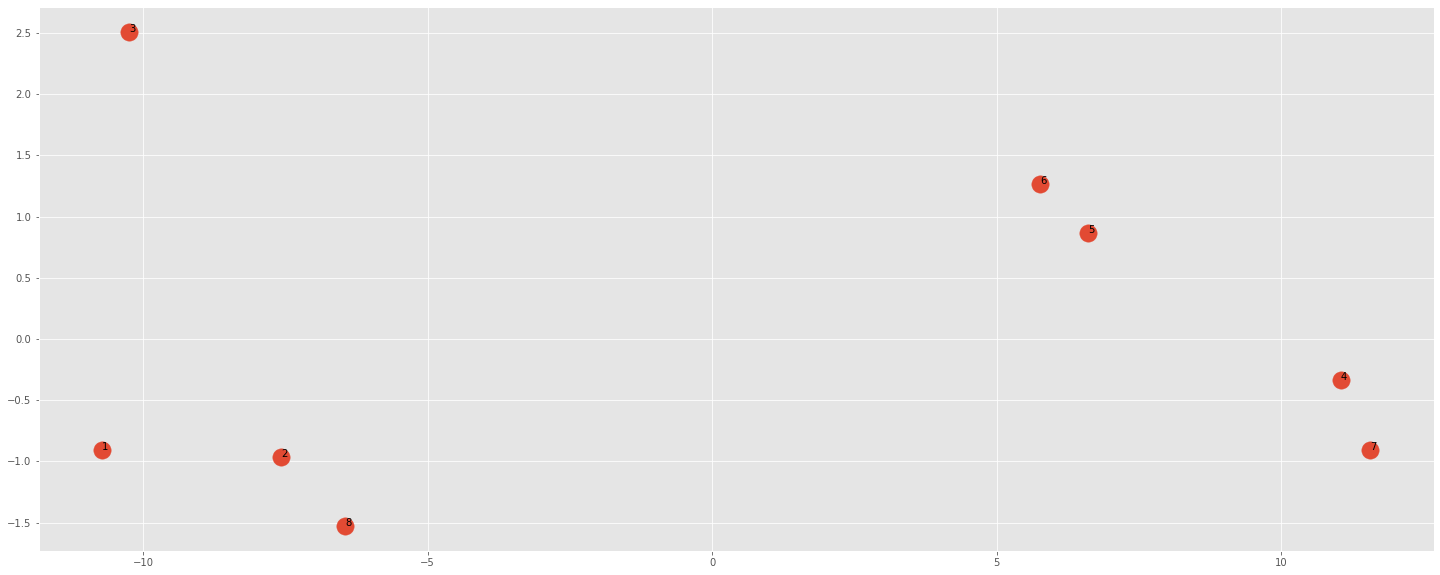

In [23]:
t_series_1_fdm = pd.DataFrame([[pos_x_p_fdm_1[i]+pos_x_fdm_1[i], pos_y_p_fdm_1[i]] for i in range(len(pos_x_p_fdm_1))],columns=['X','Y'])
t_series_2_fdm = pd.DataFrame([[pos_x_p_fdm_2[i]+pos_x_fdm_2[i], pos_y_p_fdm_2[i]] for i in range(len(pos_x_p_fdm_2))],columns=['X','Y'])
t_series_3_fdm = pd.DataFrame([[pos_x_p_fdm_3[i]+pos_x_fdm_3[i], pos_y_p_fdm_3[i]] for i in range(len(pos_x_p_fdm_3))],columns=['X','Y'])
t_series_4_fdm = pd.DataFrame([[pos_x_p_fdm_4[i]+pos_x_fdm_4[i], pos_y_p_fdm_4[i]] for i in range(len(pos_x_p_fdm_4))],columns=['X','Y'])
t_series_5_fdm = pd.DataFrame([[pos_x_p_fdm_5[i]+pos_x_fdm_5[i], pos_y_p_fdm_5[i]] for i in range(len(pos_x_p_fdm_5))],columns=['X','Y'])
t_series_6_fdm = pd.DataFrame([[pos_x_p_fdm_6[i]+pos_x_fdm_6[i], pos_y_p_fdm_6[i]] for i in range(len(pos_x_p_fdm_6))],columns=['X','Y'])
t_series_7_fdm = pd.DataFrame([[pos_x_p_fdm_7[i]+pos_x_fdm_7[i], pos_y_p_fdm_7[i]] for i in range(len(pos_x_p_fdm_7))],columns=['X','Y'])
t_series_8_fdm = pd.DataFrame([[pos_x_p_fdm_8[i]+pos_x_fdm_8[i], pos_y_p_fdm_8[i]] for i in range(len(pos_x_p_fdm_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_fdm.to_numpy().flatten(),
                t_series_2_fdm.to_numpy().flatten(),
                t_series_3_fdm.to_numpy().flatten(),
                t_series_4_fdm.to_numpy().flatten(),
                t_series_5_fdm.to_numpy().flatten(),
                t_series_6_fdm.to_numpy().flatten(),
                t_series_7_fdm.to_numpy().flatten(),
                t_series_8_fdm.to_numpy().flatten()])

df3 = df.dropna(axis = 1, how = 'any')

ssd = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df3 = pca.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.assign(Agent = [1,2,3,4,5,6,7,8])

plt.figure(figsize=(25,10))
plt.plot(range(1, 9), ssd)
plt.grid()
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

plt.figure(figsize=(25,10))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df3.iloc[i,0],df3.iloc[i,1],df3.iloc[i,2])
plt.show()

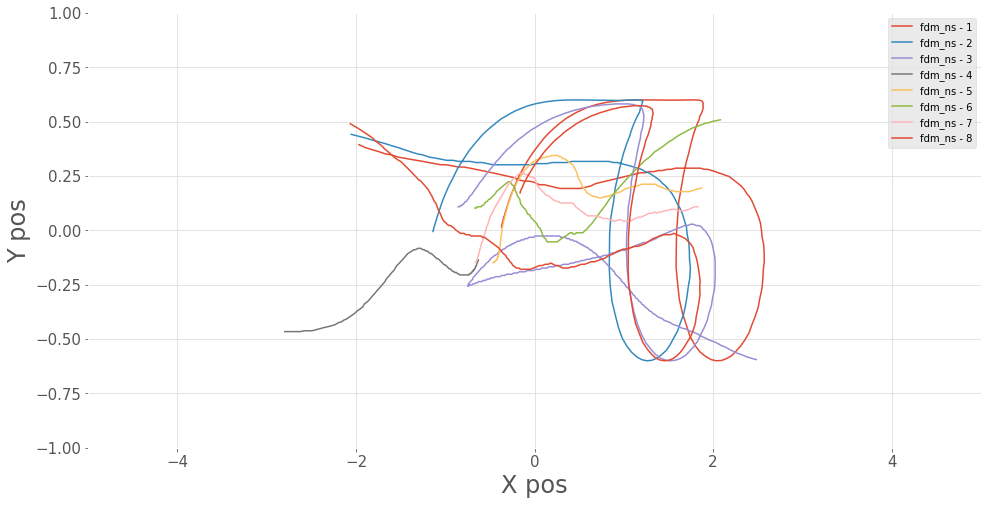

In [24]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))



plt.plot(pos_x_p_fdm_ns_1+pos_x_fdm_ns_1,pos_y_p_fdm_ns_1, label="fdm_ns - 1")
plt.plot(pos_x_p_fdm_ns_2+pos_x_fdm_ns_2,pos_y_p_fdm_ns_2, label="fdm_ns - 2")
plt.plot(pos_x_p_fdm_ns_3+pos_x_fdm_ns_3,pos_y_p_fdm_ns_3, label="fdm_ns - 3")
plt.plot(pos_x_p_fdm_ns_4+pos_x_fdm_ns_4,pos_y_p_fdm_ns_4, label="fdm_ns - 4")
plt.plot(pos_x_p_fdm_ns_5+pos_x_fdm_ns_5,pos_y_p_fdm_ns_5, label="fdm_ns - 5")
plt.plot(pos_x_p_fdm_ns_6+pos_x_fdm_ns_6,pos_y_p_fdm_ns_6, label="fdm_ns - 6")
plt.plot(pos_x_p_fdm_ns_7+pos_x_fdm_ns_7,pos_y_p_fdm_ns_7, label="fdm_ns - 7") # 5?
plt.plot(pos_x_p_fdm_ns_8+pos_x_fdm_ns_8,pos_y_p_fdm_ns_8, label="fdm_ns - 8")


plt.grid(True)
plt.legend()

plt.xlabel('Weights', fontsize = 24) 
plt.ylabel('Performance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()
plt.xlabel('X pos', fontsize = 24) 
plt.ylabel('Y pos', fontsize = 24) 

# axes.set_xlim([0,500])
ax.set_xbound(lower=-5, upper=5)
ax.set_ybound(lower=-1, upper=1)

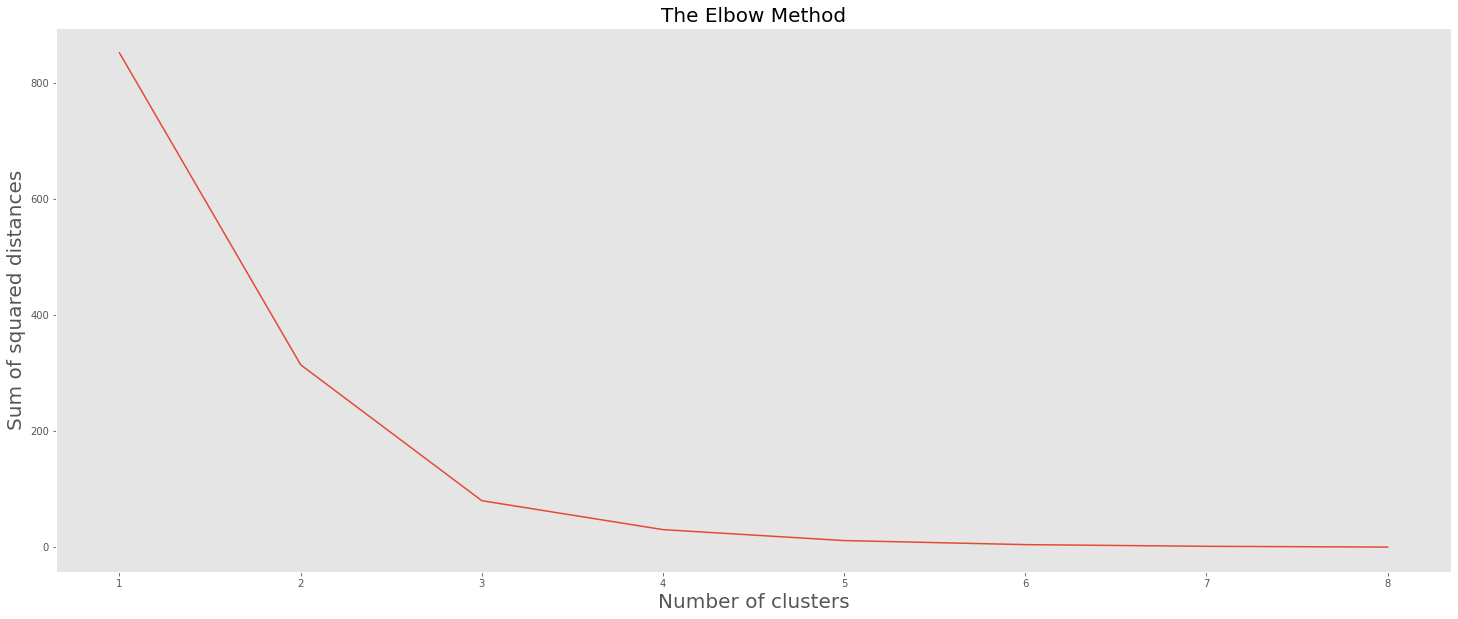

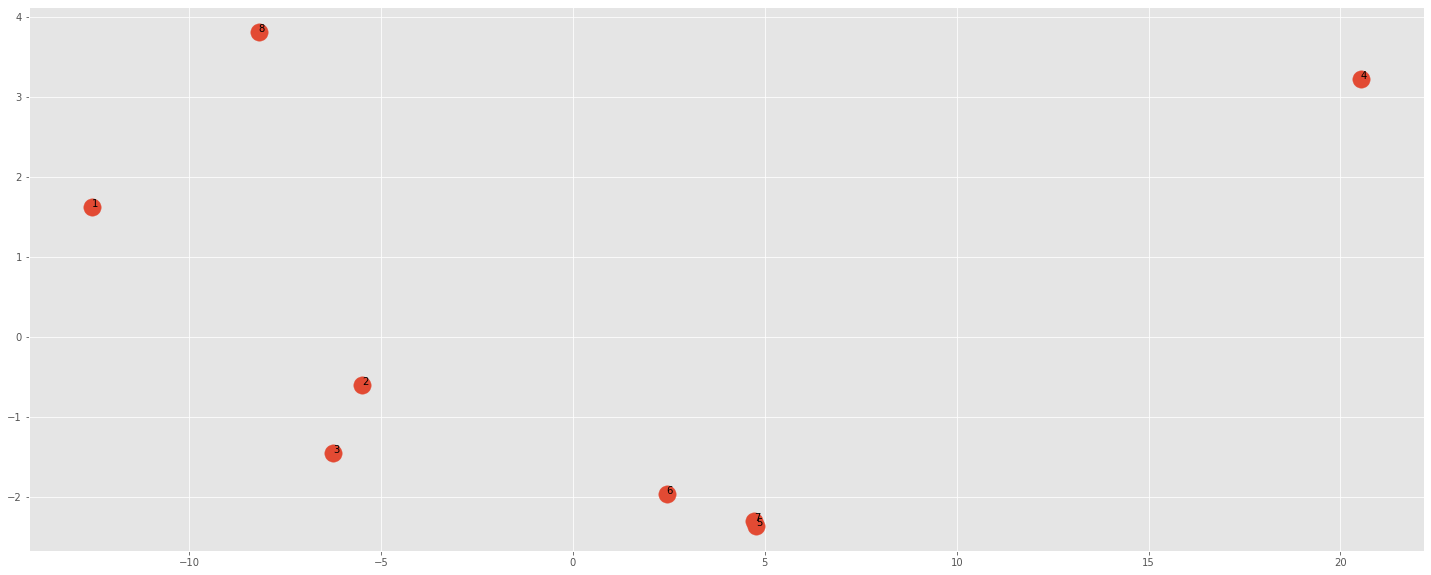

In [25]:
t_series_1_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_1[i]+pos_x_fdm_ns_1[i], pos_y_p_fdm_ns_1[i]] for i in range(len(pos_x_p_fdm_ns_1))],columns=['X','Y'])
t_series_2_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_2[i]+pos_x_fdm_ns_2[i], pos_y_p_fdm_ns_2[i]] for i in range(len(pos_x_p_fdm_ns_2))],columns=['X','Y'])
t_series_3_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_3[i]+pos_x_fdm_ns_3[i], pos_y_p_fdm_ns_3[i]] for i in range(len(pos_x_p_fdm_ns_3))],columns=['X','Y'])
t_series_4_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_4[i]+pos_x_fdm_ns_4[i], pos_y_p_fdm_ns_4[i]] for i in range(len(pos_x_p_fdm_ns_4))],columns=['X','Y'])
t_series_5_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_5[i]+pos_x_fdm_ns_5[i], pos_y_p_fdm_ns_5[i]] for i in range(len(pos_x_p_fdm_ns_5))],columns=['X','Y'])
t_series_6_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_6[i]+pos_x_fdm_ns_6[i], pos_y_p_fdm_ns_6[i]] for i in range(len(pos_x_p_fdm_ns_6))],columns=['X','Y'])
t_series_7_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_7[i]+pos_x_fdm_ns_7[i], pos_y_p_fdm_ns_7[i]] for i in range(len(pos_x_p_fdm_ns_7))],columns=['X','Y'])
t_series_8_fdm_ns = pd.DataFrame([[pos_x_p_fdm_ns_8[i]+pos_x_fdm_ns_8[i], pos_y_p_fdm_ns_8[i]] for i in range(len(pos_x_p_fdm_ns_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_fdm_ns.to_numpy().flatten(),
                t_series_2_fdm_ns.to_numpy().flatten(),
                t_series_3_fdm_ns.to_numpy().flatten(),
                t_series_4_fdm_ns.to_numpy().flatten(),
                t_series_5_fdm_ns.to_numpy().flatten(),
                t_series_6_fdm_ns.to_numpy().flatten(),
                t_series_7_fdm_ns.to_numpy().flatten(),
                t_series_8_fdm_ns.to_numpy().flatten()])

df3 = df.dropna(axis = 1, how = 'any')

ssd = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df3 = pca.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.assign(Agent = [1,2,3,4,5,6,7,8])

plt.figure(figsize=(25,10))
plt.plot(range(1, 9), ssd)
plt.grid()
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

plt.figure(figsize=(25,10))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df3.iloc[i,0],df3.iloc[i,1],df3.iloc[i,2])
plt.show()

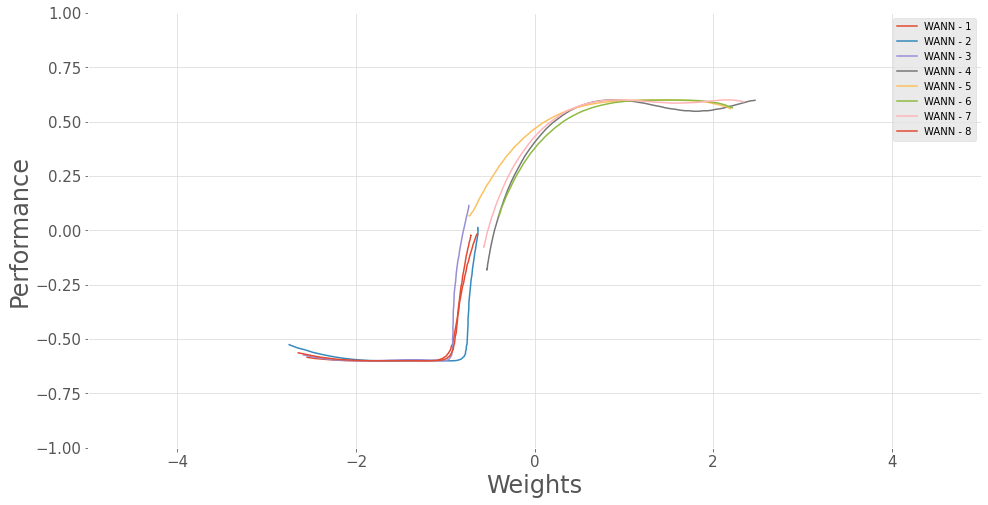

In [26]:
# Plot fitness progress:
plt.style.use('ggplot')
plt.figure(figsize=(figsize_x*2,figsize_y*2))
ax = plt.axes()
ax.set(facecolor = "white")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
xi = list(range(len(weights)))



plt.plot(pos_x_p_wann_1+pos_x_wann_1,pos_y_p_wann_1, label="WANN - 1")
plt.plot(pos_x_p_wann_2+pos_x_wann_2,pos_y_p_wann_2, label="WANN - 2")
plt.plot(pos_x_p_wann_3+pos_x_wann_3,pos_y_p_wann_3, label="WANN - 3") #no
plt.plot(pos_x_p_wann_4+pos_x_wann_4,pos_y_p_wann_4, label="WANN - 4")
plt.plot(pos_x_p_wann_5+pos_x_wann_5,pos_y_p_wann_5, label="WANN - 5")
plt.plot(pos_x_p_wann_6+pos_x_wann_6,pos_y_p_wann_6, label="WANN - 6")
plt.plot(pos_x_p_wann_7+pos_x_wann_7,pos_y_p_wann_7, label="WANN - 7")
plt.plot(pos_x_p_wann_8+pos_x_wann_8,pos_y_p_wann_8, label="WANN - 8") # 2


plt.grid(True)
plt.legend()

plt.xlabel('X pos', fontsize = 24) 
plt.ylabel('Y pos', fontsize = 24) 

plt.xlabel('Weights', fontsize = 24) 
plt.ylabel('Performance', fontsize = 24) 
plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15)

axes = plt.gca()


# axes.set_xlim([0,500])
ax.set_xbound(lower=-5, upper=5)
ax.set_ybound(lower=-1, upper=1)

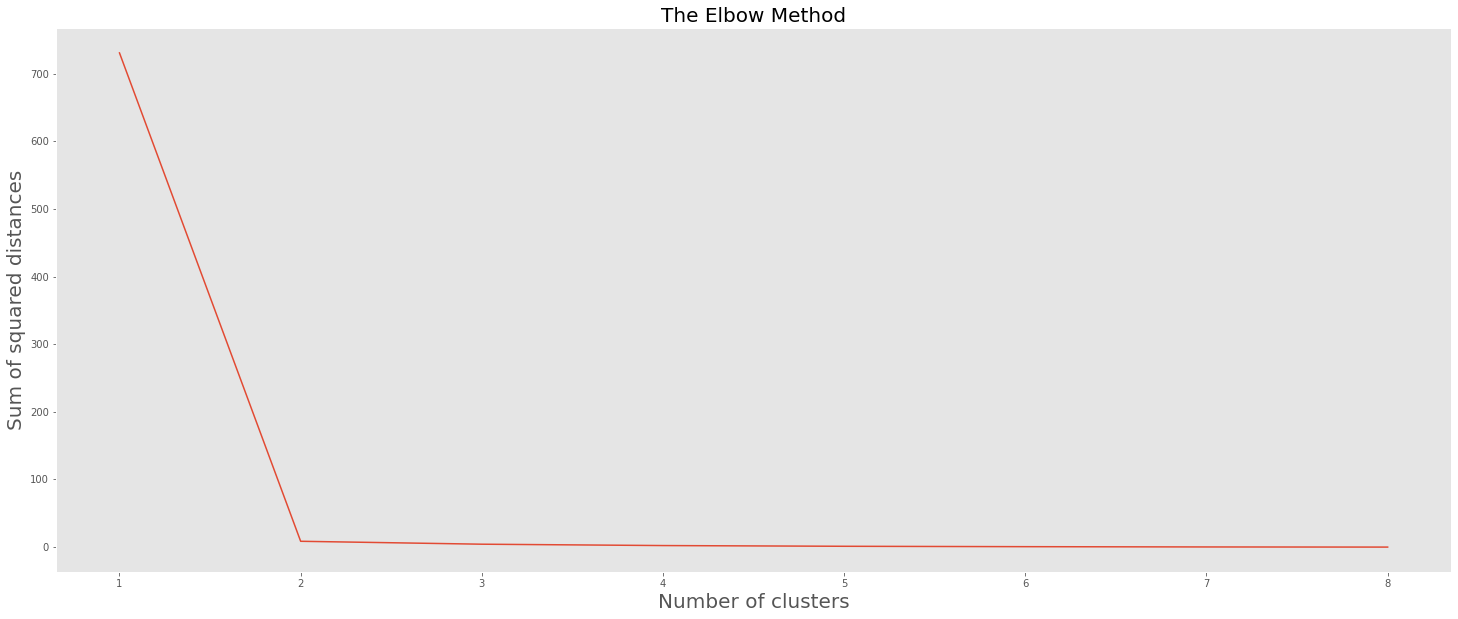

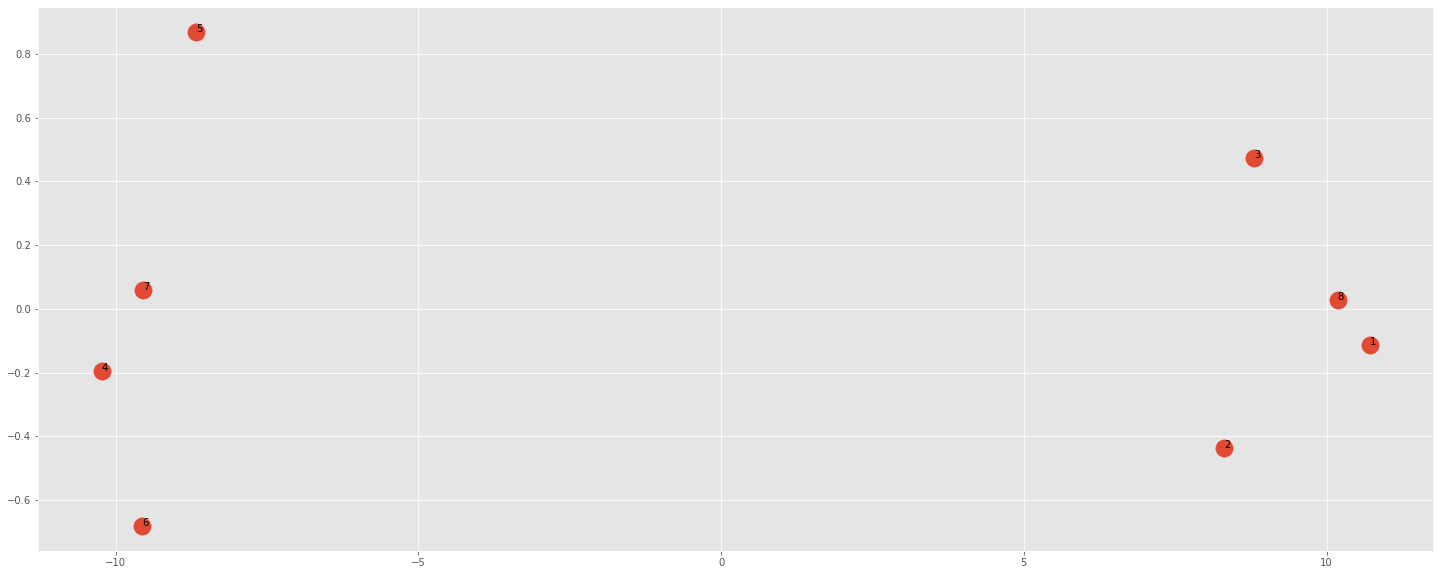

In [27]:
t_series_1_wann = pd.DataFrame([[pos_x_p_wann_1[i]+pos_x_wann_1[i], pos_y_p_wann_1[i]] for i in range(len(pos_x_p_wann_1))],columns=['X','Y'])
t_series_2_wann = pd.DataFrame([[pos_x_p_wann_2[i]+pos_x_wann_2[i], pos_y_p_wann_2[i]] for i in range(len(pos_x_p_wann_2))],columns=['X','Y'])
t_series_3_wann = pd.DataFrame([[pos_x_p_wann_3[i]+pos_x_wann_3[i], pos_y_p_wann_3[i]] for i in range(len(pos_x_p_wann_3))],columns=['X','Y'])
t_series_4_wann = pd.DataFrame([[pos_x_p_wann_4[i]+pos_x_wann_4[i], pos_y_p_wann_4[i]] for i in range(len(pos_x_p_wann_4))],columns=['X','Y'])
t_series_5_wann = pd.DataFrame([[pos_x_p_wann_5[i]+pos_x_wann_5[i], pos_y_p_wann_5[i]] for i in range(len(pos_x_p_wann_5))],columns=['X','Y'])
t_series_6_wann = pd.DataFrame([[pos_x_p_wann_6[i]+pos_x_wann_6[i], pos_y_p_wann_6[i]] for i in range(len(pos_x_p_wann_6))],columns=['X','Y'])
t_series_7_wann = pd.DataFrame([[pos_x_p_wann_7[i]+pos_x_wann_7[i], pos_y_p_wann_7[i]] for i in range(len(pos_x_p_wann_7))],columns=['X','Y'])
t_series_8_wann = pd.DataFrame([[pos_x_p_wann_8[i]+pos_x_wann_8[i], pos_y_p_wann_8[i]] for i in range(len(pos_x_p_wann_8))],columns=['X','Y'])


df = pd.DataFrame([t_series_1_wann.to_numpy().flatten(),
                t_series_2_wann.to_numpy().flatten(),
                t_series_3_wann.to_numpy().flatten(),
                t_series_4_wann.to_numpy().flatten(),
                t_series_5_wann.to_numpy().flatten(),
                t_series_6_wann.to_numpy().flatten(),
                t_series_7_wann.to_numpy().flatten(),
                t_series_8_wann.to_numpy().flatten()])

df3 = df.dropna(axis = 1, how = 'any')

ssd = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5)
    kmeans.fit(df3)
    ssd.append(kmeans.inertia_)

pca = PCA(n_components=2) 
    

df3 = pca.fit_transform(df3)
df3 = pd.DataFrame(df3)
df3 = df3.assign(Agent = [1,2,3,4,5,6,7,8])

plt.figure(figsize=(25,10))
plt.plot(range(1, 9), ssd)
plt.grid()
plt.title('The Elbow Method', fontsize =20)
plt.xlabel('Number of clusters', fontsize =20)
plt.ylabel('Sum of squared distances',fontsize =20)

plt.show()

plt.figure(figsize=(25,10))
plt.scatter(df3.iloc[:,0],df3.iloc[:,1], s=300)
for i in range(0, 8):
     plt.text(df3.iloc[i,0],df3.iloc[i,1],df3.iloc[i,2])
plt.show()